In [55]:
from neuralprophet import NeuralProphet
import pandas as pd

In [93]:
df = pd.read_csv('tpcc_table_growth.csv')
df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [94]:
m = NeuralProphet()

In [95]:
df

,ds,y
0,2022-03-30 03:34:41.179241984,18636800
1,2022-03-30 03:34:41.181339136,18636800
2,2022-03-30 03:34:41.183379200,18636800
3,2022-03-30 03:34:41.185342976,18636800
4,2022-03-30 03:34:41.187341056,18636800
...,...,...
31928,2022-03-30 03:35:42.861576448,20520960
31929,2022-03-30 03:35:42.863450112,20520960
31930,2022-03-30 03:35:42.865325312,20520960
31931,2022-03-30 03:35:42.867252224,20520960


In [96]:
metrics = m.fit(df, freq='MS')

INFO - (NP.df_utils._infer_frequency) - Major frequency 1897216N corresponds to 0.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 77


  0%|          | 0/162 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.03E-02, min: 1.88E+01


  0%|          | 0/162 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.03E-02, min: 1.12E+01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.33E-02
Epoch[77/77]: 100%|██████████| 77/77 [00:53<00:00,  1.43it/s, SmoothL1Loss=1.09e-5, MAE=5.23e+3, RMSE=8.42e+3, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency 1897216N corresponds to 0.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = d

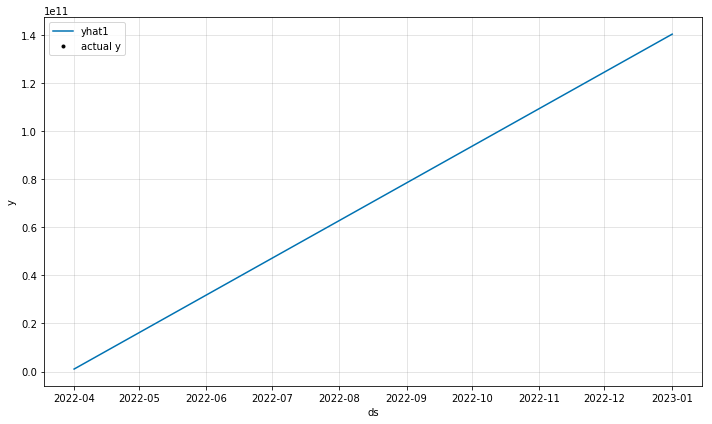

In [101]:
future = m.make_future_dataframe(df=df, periods=10)
forecast = m.predict(df=future)
fig_forecast = m.plot(forecast)

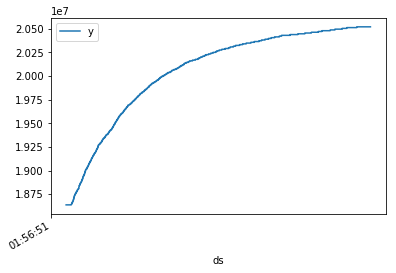

In [89]:
df.plot(x='ds', y='y')

INFO - (NP.df_utils._infer_frequency) - Major frequency 1897216N corresponds to 0.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency 1897216N corresponds to 0.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[

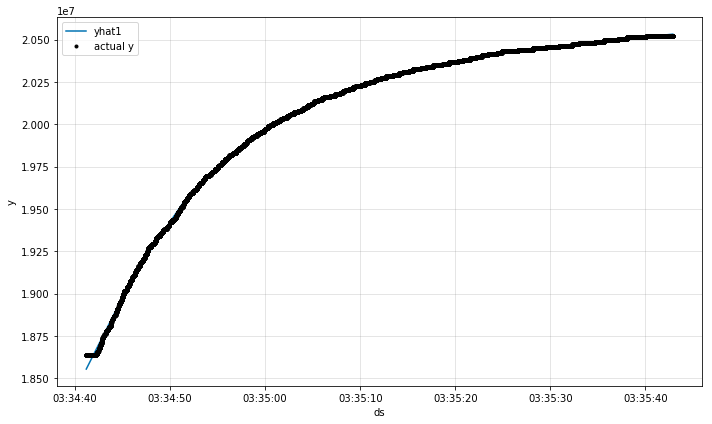

In [99]:
forecast = m.predict(df)
fig_forecast = m.plot(forecast)